Library install 

In [128]:
!pip install -r Requirements.txt

Necessary library

In [184]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report, confusion_matrix,accuracy_score

Importing Dataset

In [130]:
# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets


In [131]:
df=pd.concat([X,y],axis=1) # concating the X and y for full dataframes 

Checking missing values

In [132]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [133]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [134]:
df.shape

(649, 33)

In [135]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


Plot Graphs

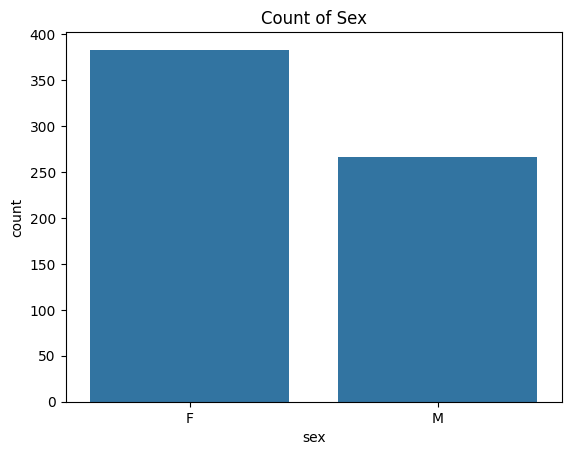

In [136]:
sns.countplot(x="sex",data=df)
plt.title("Count of Sex")
plt.show()

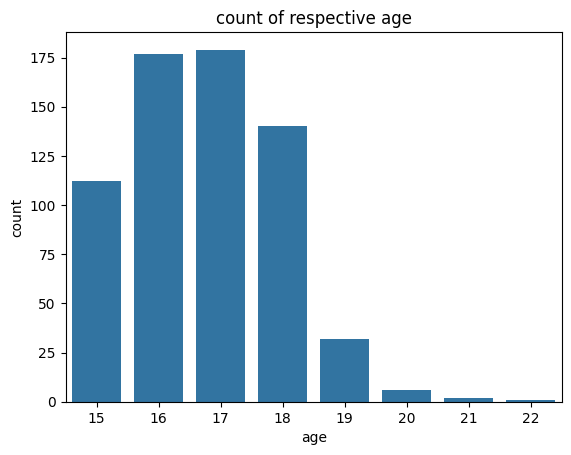

In [137]:
sns.countplot(x="age",data=df)
plt.title("count of respective age")
plt.show()

In [138]:
print(df.head(5))

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [139]:
df.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [140]:
df["G3"].mean()

11.906009244992296

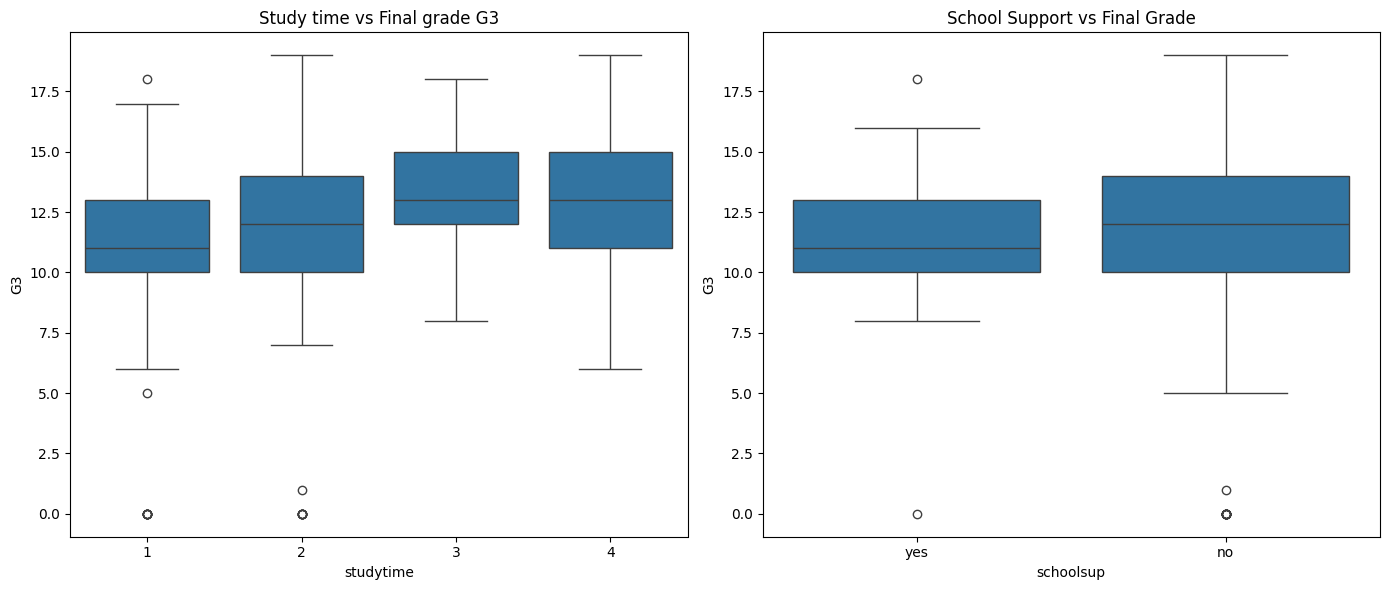

In [141]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.boxplot(x="studytime",y="G3",data=df,ax=axes[0])
axes[0].set_title("Study time vs Final grade G3")

sns.boxplot(x='schoolsup', y='G3', data=df,ax=axes[1])
axes[1].set_title("School Support vs Final Grade")
plt.tight_layout()
plt.show()

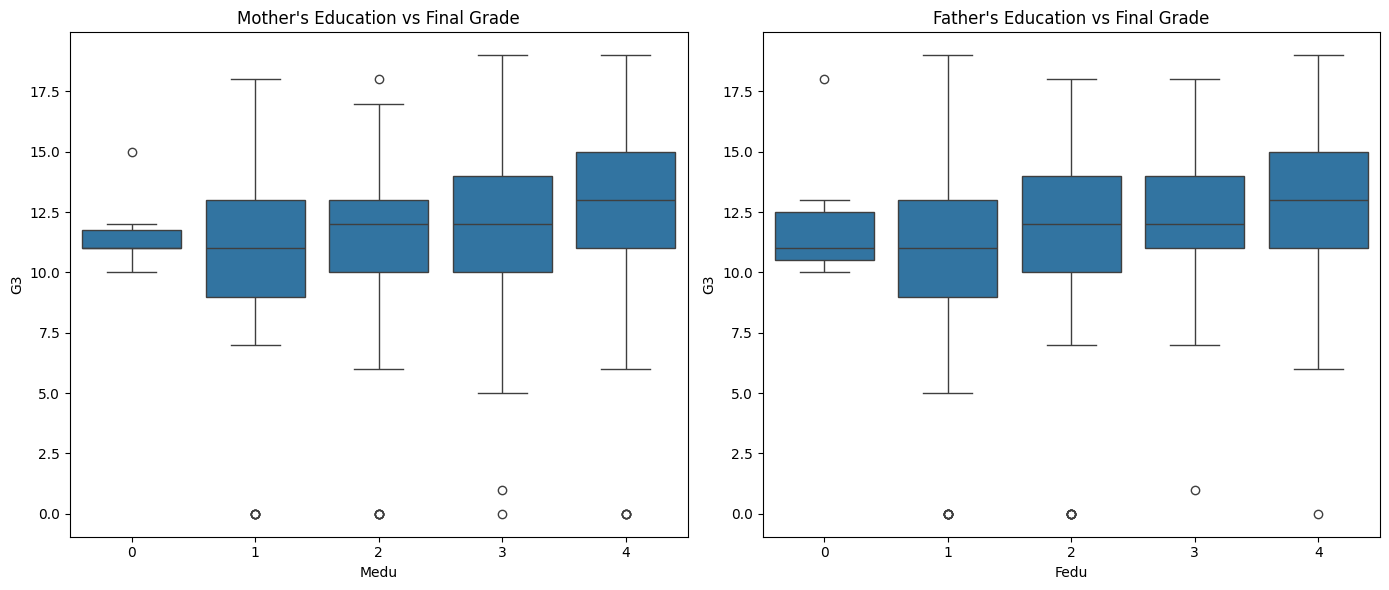

In [142]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
sns.boxplot(x='Medu', y='G3', data=df,ax=axes[0])
axes[0].set_title("Mother's Education vs Final Grade")
sns.boxplot(x='Fedu', y='G3', data=df,ax=axes[1])
axes[1].set_title("Father's Education vs Final Grade")
plt.tight_layout()
plt.show()

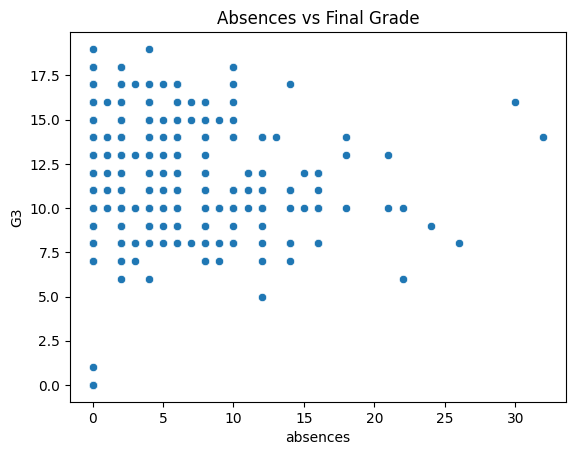

In [143]:
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Absences vs Final Grade")
plt.show()

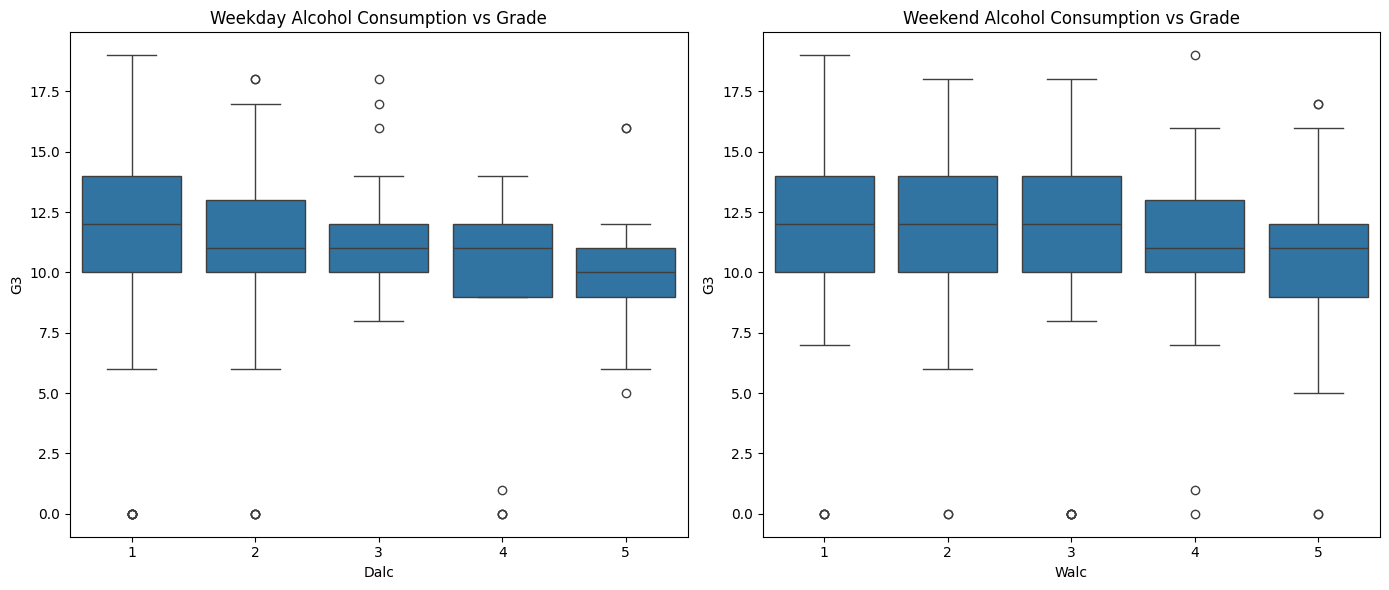

In [144]:
fig , axes=plt.subplots(1,2,figsize=(14,6))
sns.boxplot(x='Dalc', y='G3', data=df,ax=axes[0])
axes[0].set_title("Weekday Alcohol Consumption vs Grade")
sns.boxplot(x='Walc', y='G3', data=df,ax=axes[1])
axes[1].set_title("Weekend Alcohol Consumption vs Grade")
plt.tight_layout()
plt.show()

In [145]:
#simple binary conversion
df_numeric = df.copy()
df_numeric = pd.get_dummies(df_numeric,drop_first=True)

In [146]:
# drop non-numeric columns (optional)
df_numeric = df_numeric.select_dtypes(include='number')

# correlation
corr = df_numeric.corr()

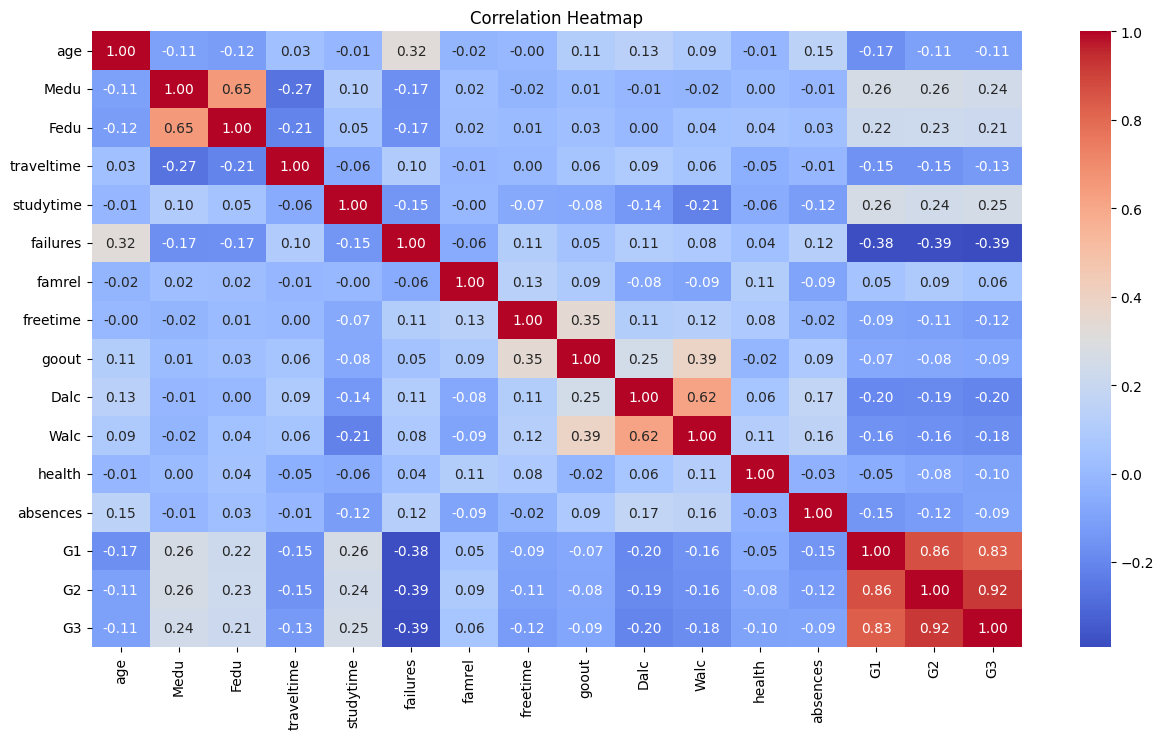

In [147]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True,cmap="coolwarm", fmt=".2f") 
plt.title("Correlation Heatmap")
plt.show()

Random Forset Regression

In [148]:
df_new=df.copy()
df_new['pass_fail']=df_new['G3'].apply(lambda x:1 if x>=10 else 0)


In [149]:
df_model=df_numeric.copy()
X=pd.get_dummies(df_new.drop(["G3",'pass_fail'],axis=1),drop_first=True)
y=df_new["pass_fail"]

In [ ]:
#HyperParameter Tuning 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [152]:
grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'bootstrap': [True, False], 'max_depth': [None, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [166]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [188]:
# Giving the best parameter for the model
model=RandomForestClassifier(random_state=42,n_estimators=300,min_samples_leaf=2,min_samples_split=5,bootstrap=False,max_depth=None)
model.fit(X_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [189]:
y_pred=model.predict(X_test)

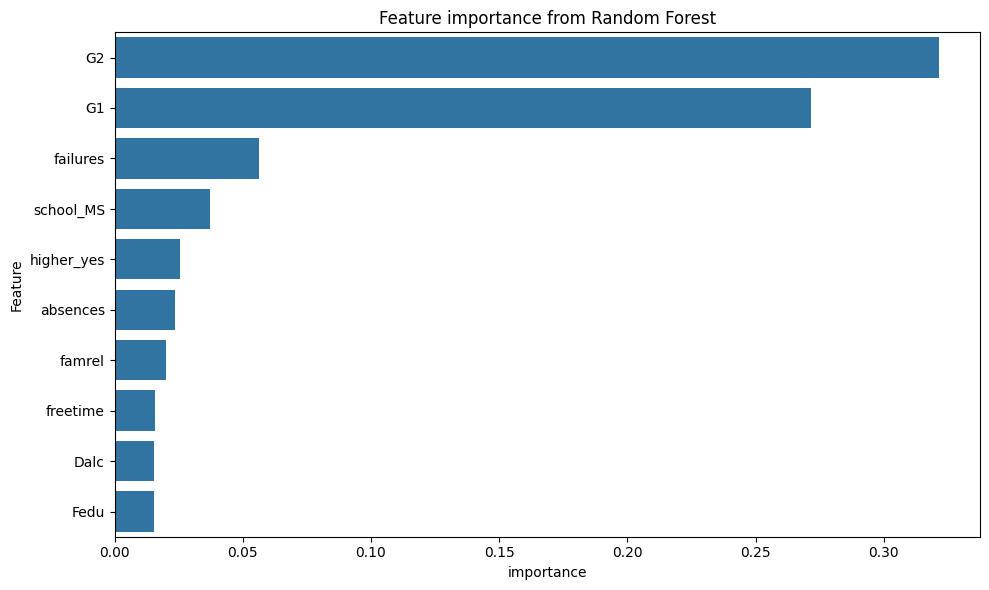

In [190]:
importances=model.feature_importances_
feature=X.columns
impor_feat=pd.DataFrame({'feature':feature,'important':importances})
top_10=impor_feat.sort_values(by='important',ascending=False).head(10)
plt.figure(figsize=(10,6))  
sns.barplot(x='important',y='feature',data=top_10)
plt.title("Feature importance from Random Forest")
plt.xlabel("importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [208]:
acc_rf=accuracy_score(y_test, y_pred)


In [209]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64        15
           1       0.95      0.97      0.96       115

    accuracy                           0.92       130
   macro avg       0.82      0.78      0.80       130
weighted avg       0.92      0.92      0.92       130



LogisticRegression

In [201]:
model_X= LogisticRegression(max_iter=1000)
model_X.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [199]:
y_pred_L=model_X.predict(X_test)

In [204]:
acc_l=accuracy_score(y_test,y_pred_L)

In [207]:
acc_l

0.9153846153846154

In [206]:
# c_m=confusion_matrix(y_test, y_pred_L)
# sns.heatmap(c_m,linewidths=.5,annot=True)
# plt.title("confusion_matrix_Heatmap")
# plt.xlabel("y_test")
# plt.ylabel("y_pred_L")
# plt.tight_layout()
# plt.show()

In [203]:
print(classification_report(y_test, y_pred_L))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.96      0.94      0.95       115

    accuracy                           0.92       130
   macro avg       0.79      0.84      0.81       130
weighted avg       0.92      0.92      0.92       130



In [238]:
models=['Random Forest','Logistic Regression']
acc=[acc_rf*100,acc_l*100]


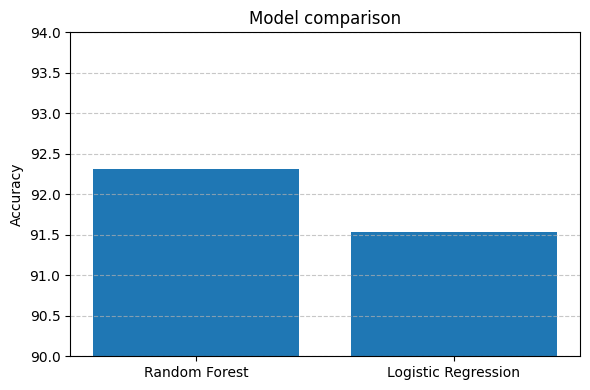

In [237]:
plt.figure(figsize=(6,4))
plt.bar(models,acc)
plt.title('Model comparison')
plt.ylabel('Accuracy')
plt.ylim(90,94)
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()
